**Md Shezan Ahmed**

* Connect on LinkedIn: linkedin.com/in/shezanahmed123
* GitHub: github.com/shezanahmed


Analytic Problem Statement:
* Our goal is to create a classification model that determines the likelihood of employee sick mental health treatment based on survey answers. The model will predict employee treatment-seeking behavior.
* Target Variable: `treatment`
* The data type consists of two categories (binary: “Yes” or “No”) to indicate prediction outcomes.
* The main purpose is to deploy supervised machine learning models that enable accurate categorization of future respondents between Yes and No.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Run the following code only to work in Google Collab
# from google.colab import drive drive.mount('/content/drive')

In [2]:
dataset = pd.read_csv('/kaggle/input/mental-health-in-tech-survey/survey.csv')

# **Exploratory Data Analysis**

In [3]:
dataset.shape

(1259, 27)

In [4]:
dataset.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
dataset.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [7]:
#To indentify how many % is missing values
dataset.isnull().mean()*100

Timestamp                     0.000000
Age                           0.000000
Gender                        0.000000
Country                       0.000000
state                        40.905481
self_employed                 1.429706
family_history                0.000000
treatment                     0.000000
work_interfere               20.969023
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      0.000000
care_options                  0.000000
wellness_program              0.000000
seek_help                     0.000000
anonymity                     0.000000
leave                         0.000000
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical            0.000000
obs_consequence          

# **Cleaning the Dataset for Analysis**

In [8]:
#Droping the columns which are directly not relatable with the analysis
dataset_clean = dataset.copy()
dataset_clean.drop(['comments', 'Timestamp' ],axis=1,inplace=True)

In [9]:
dataset_clean.shape

(1259, 25)

In [10]:
#Checking if the dataset contains duplicate rows
duplicate_rows = dataset_clean.duplicated()

if duplicate_rows.any():
    print("There are duplicate rows in the dataset.")
    print("Number of duplicate rows:", duplicate_rows.sum())
else:
    print("There are no duplicate rows in the dataset.")

There are duplicate rows in the dataset.
Number of duplicate rows: 4


In [11]:
# Remove duplicate rows from the dataset
dataset_clean = dataset_clean.drop_duplicates()


In [12]:
# Verify the shape of the dataset after removing duplicates
print(dataset_clean.shape)


(1255, 25)


In [13]:
#To separate categorical columns from the dataset and printing it's number of unique values.
cat_cols = []
for col in dataset_clean.columns:
  if dataset_clean[col].dtype == 'object':
    print(col,":", dataset_clean[col].nunique())
    cat_cols.append(col)

Gender : 49
Country : 48
state : 45
self_employed : 2
family_history : 2
treatment : 2
work_interfere : 4
no_employees : 6
remote_work : 2
tech_company : 2
benefits : 3
care_options : 3
wellness_program : 3
seek_help : 3
anonymity : 3
leave : 5
mental_health_consequence : 3
phys_health_consequence : 3
coworkers : 3
supervisor : 3
mental_health_interview : 3
phys_health_interview : 3
mental_vs_physical : 3
obs_consequence : 2


In [14]:
#To separate numerical columns from the dataset with it's number of unique values.
num_col = []
for col in dataset_clean.columns:
    if dataset_clean[col].dtype != 'object':
        print(col,":", dataset_clean[col].nunique())
        num_col.append(col)

Age : 53


In [15]:
# Bird-eye view of the data

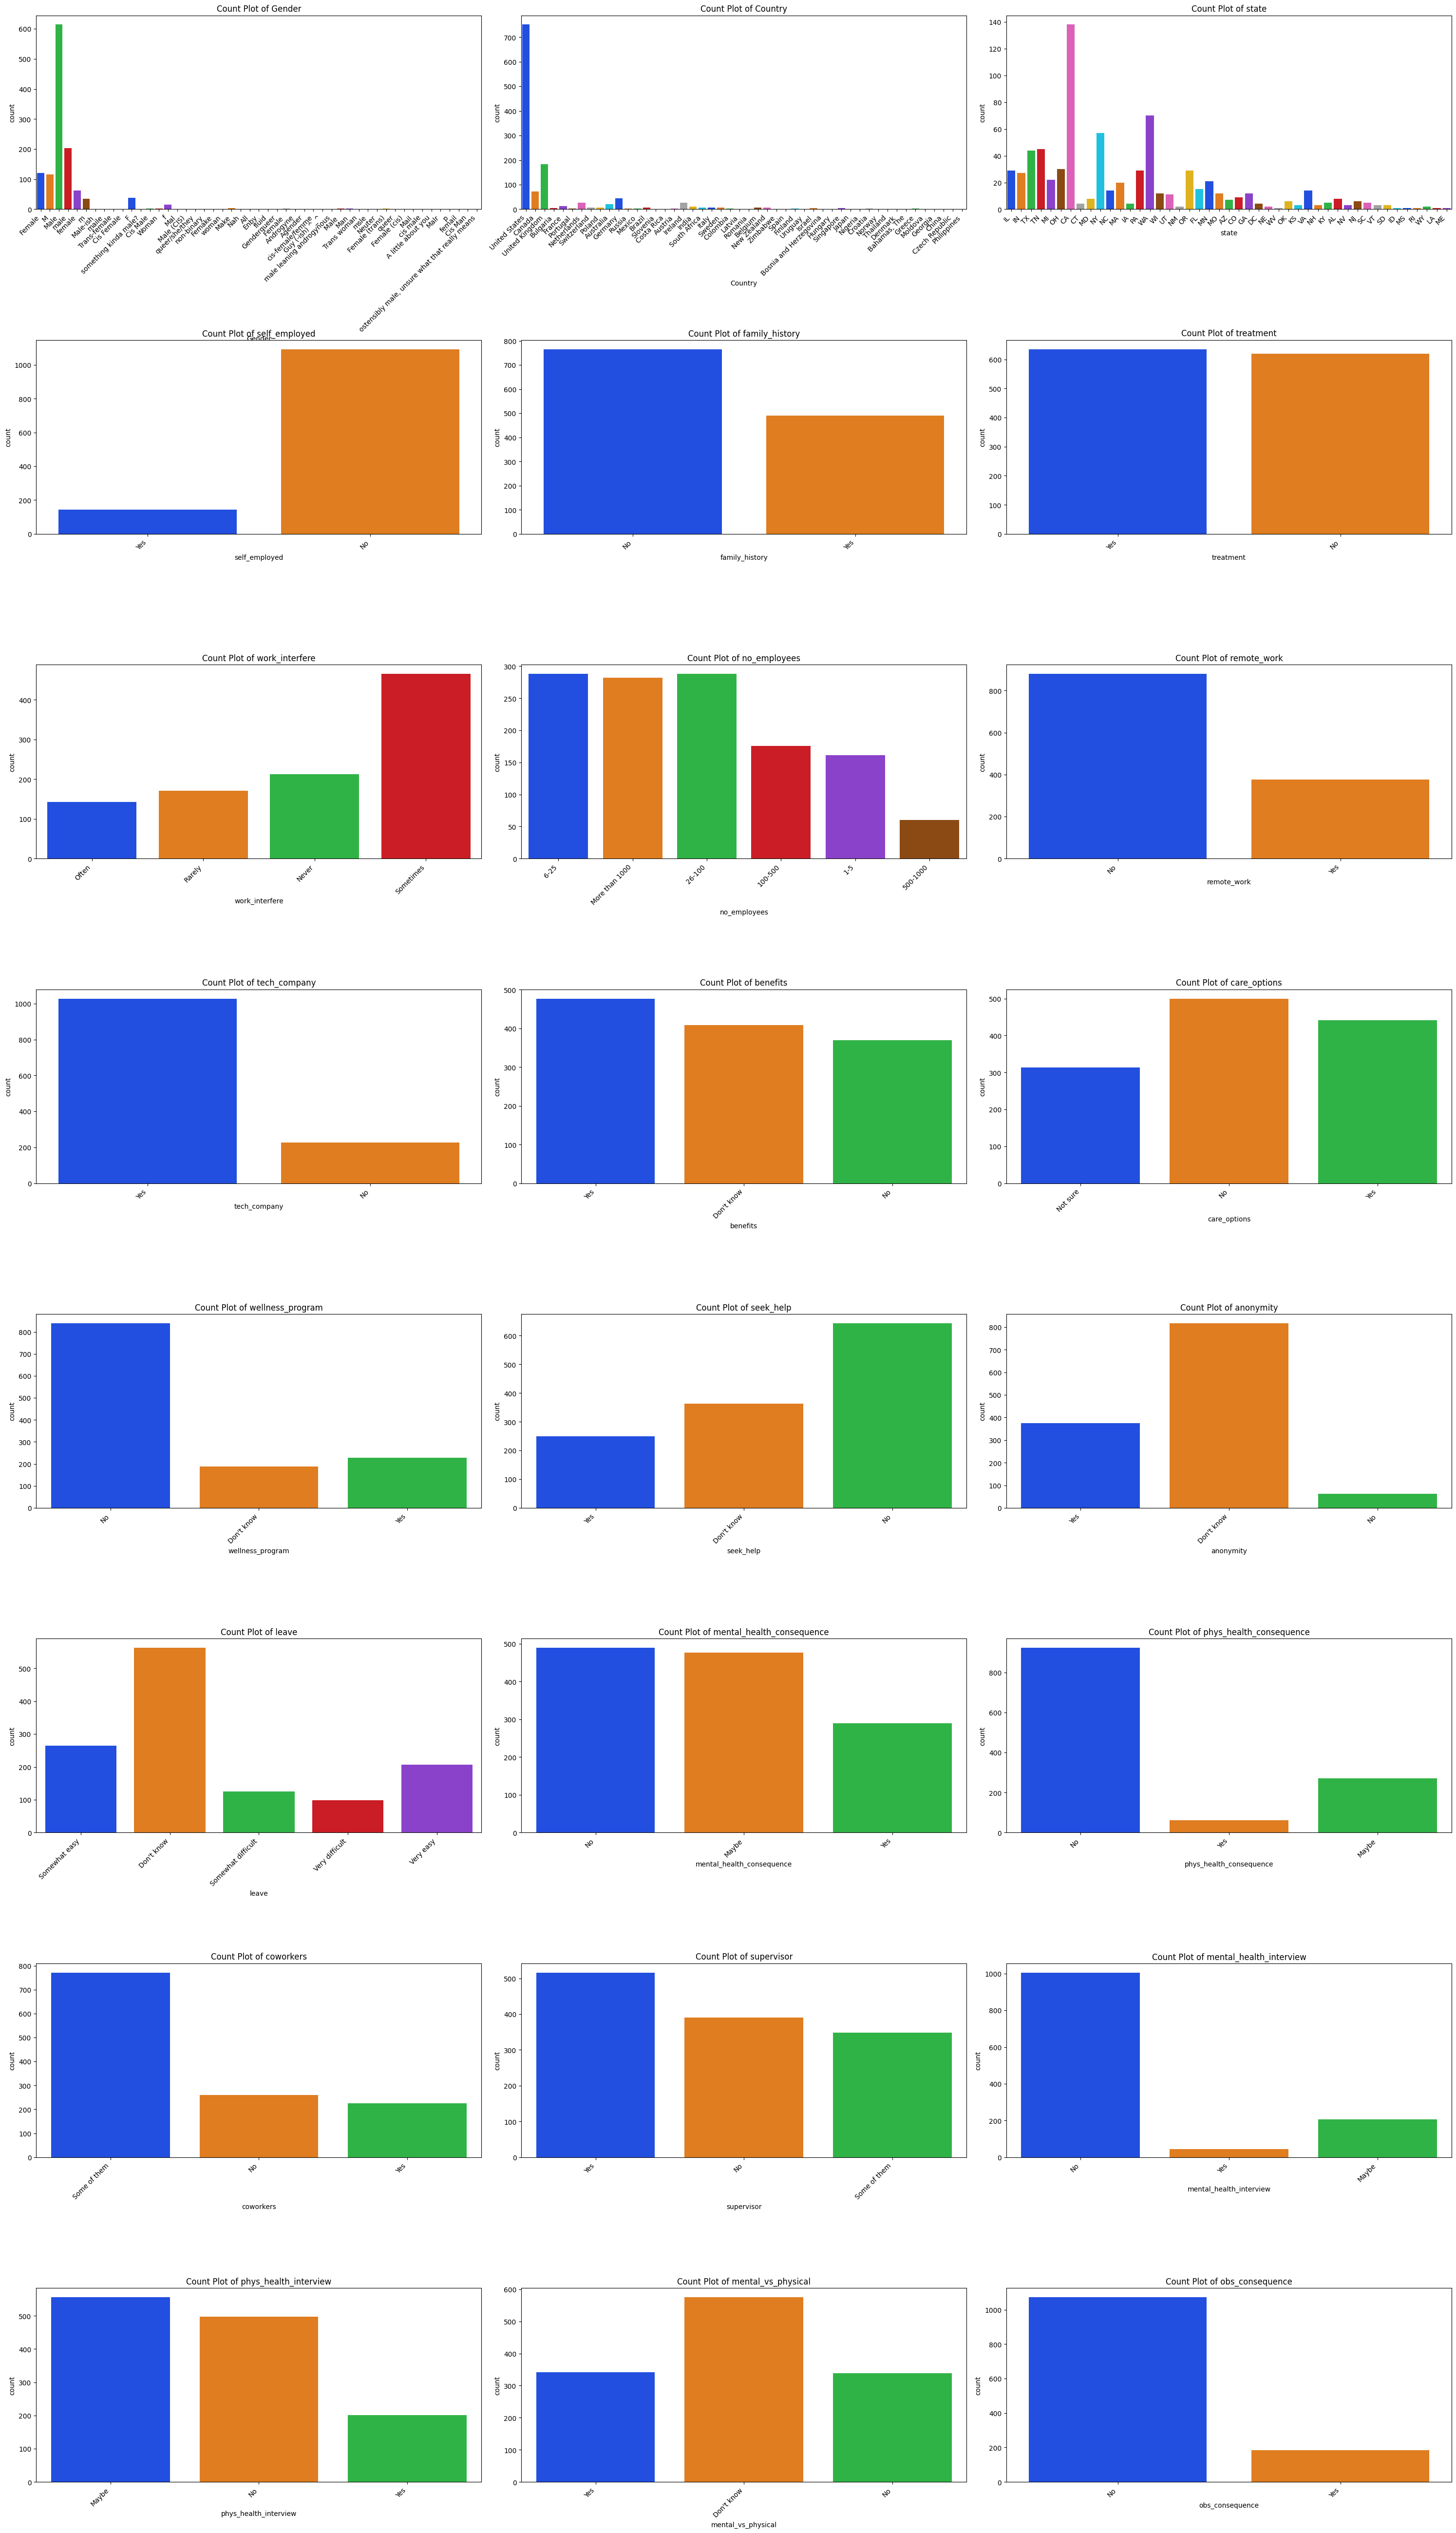

In [16]:
# Ploting bar-graphs for categorical columns
plt.figure(figsize=(30, 60))
for i, col in enumerate(cat_cols):
    plt.subplot(8, 3, i + 1)
    sns.countplot(data=dataset_clean, x=col, palette='bright')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Count Plot of {col}')
    plt.tight_layout()

plt.subplots_adjust(bottom=0.15)
plt.savefig('Count_plots.png', format='png', dpi=300)
plt.show()

In [17]:
# Looking to 'Age' feature (Numerical Column) to plot accurate histograph.
dataset_clean['Age'].shape

(1255,)

In [18]:
dataset_clean['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

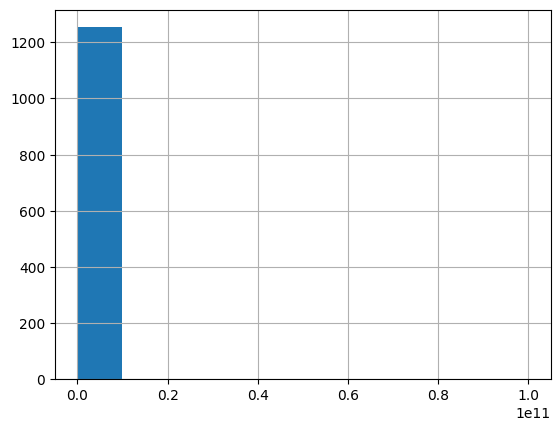

In [19]:
dataset_clean['Age'].hist()
plt.show()

In [20]:
# Removing unnecessary values from 'Age' to print final histograph.
dataset_clean.drop(dataset_clean[dataset_clean['Age'] <= 16].index, inplace=True)
dataset_clean.drop(dataset_clean[dataset_clean['Age'] >= 100].index, inplace=True)

In [21]:
# Making sure that rows are removed from the dataset.
print("Original dataset Age column shape:", dataset['Age'].shape)
print("Cleaned dataset Age column shape:", dataset_clean['Age'].shape)

Original dataset Age column shape: (1259,)
Cleaned dataset Age column shape: (1247,)


In [22]:
dataset_clean['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

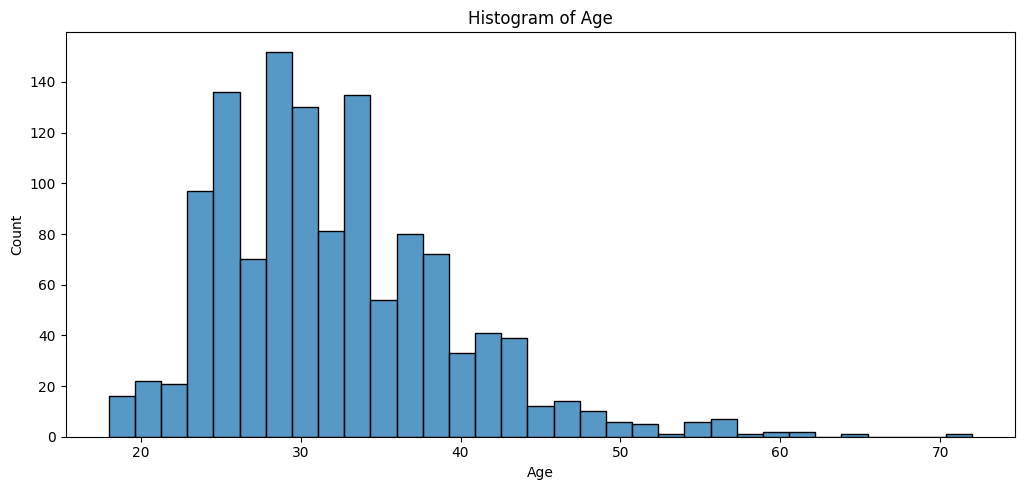

In [23]:
# Ploting histograms for numeric columns
plt.figure(figsize=(20, 5))
for i, col in enumerate(num_col):
    plt.subplot(1, 2, i + 1)
    sns.histplot(data=dataset_clean, x=col)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()


plt.savefig('Histogram of Age.png', format='png', dpi=300)
plt.show()

In [24]:
#To indentify how many % is missing values
dataset_clean.isnull().mean()*100

Age                           0.000000
Gender                        0.000000
Country                       0.000000
state                        40.817963
self_employed                 1.443464
family_history                0.000000
treatment                     0.000000
work_interfere               20.930233
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      0.000000
care_options                  0.000000
wellness_program              0.000000
seek_help                     0.000000
anonymity                     0.000000
leave                         0.000000
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical            0.000000
obs_consequence               0.000000
dtype: float64

In [25]:
dataset_clean['state'].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

In [26]:
drop_cols = []

for col in dataset_clean.columns:
  if dataset_clean[col].isnull().mean()*100 > 30:
    drop_cols.append(col)

dataset_clean.drop(drop_cols, axis=1, inplace=True)

In [27]:
dataset_clean['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [28]:
dataset_clean['work_interfere'] = dataset_clean['work_interfere'].fillna('Do not know')

In [29]:
dataset_clean['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [30]:
dataset_clean['self_employed'] = dataset_clean['self_employed'].fillna(dataset_clean['self_employed'].mode().iloc[0])

In [31]:
dataset_clean['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
dataset_clean.isnull().mean()*100

Age                          0.0
Gender                       0.0
Country                      0.0
self_employed                0.0
family_history               0.0
treatment                    0.0
work_interfere               0.0
no_employees                 0.0
remote_work                  0.0
tech_company                 0.0
benefits                     0.0
care_options                 0.0
wellness_program             0.0
seek_help                    0.0
anonymity                    0.0
leave                        0.0
mental_health_consequence    0.0
phys_health_consequence      0.0
coworkers                    0.0
supervisor                   0.0
mental_health_interview      0.0
phys_health_interview        0.0
mental_vs_physical           0.0
obs_consequence              0.0
dtype: float64

In [33]:
#Replace values which have different names in gender feature
dataset_clean['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [34]:
# Replacing the invalid values to it's correct form
dataset_clean['Gender'].replace(['M', 'Male ', 'male', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

dataset_clean['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

dataset_clean['Gender'].replace(['Trans-female', 'something kinda male?',
       'queer/she/they', 'non-binary', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Androgyne', 'Agender', 'Guy (-ish) ^_^',
       'male leaning androgynous', 'Trans woman', 'Neuter',
       'Female (trans)', 'queer', 'A little about you',
       'ostensibly male, unsure what that really means'], 'Other', inplace = True)

In [35]:
dataset_clean['Gender'].value_counts()

Gender
Male      982
Female    247
Other      18
Name: count, dtype: int64

In [36]:
#Looking for unique values in 'County' column
dataset_clean['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [37]:
# Replacing not common country entries with Other
dataset_clean['Country'] = dataset_clean['Country'].apply(
    lambda x: x if x in ['United States', 'Canada', 'United Kingdom'] else 'Other')

In [38]:
#To check there is not any 'NaN' values in the dataset
for col in dataset_clean.columns:
    print(f"\n{col}: {dataset_clean[col].unique()}")


Age: [37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]

Gender: ['Female' 'Male' 'Other']

Country: ['United States' 'Canada' 'United Kingdom' 'Other']

self_employed: ['No' 'Yes']

family_history: ['No' 'Yes']

treatment: ['Yes' 'No']

work_interfere: ['Often' 'Rarely' 'Never' 'Sometimes' 'Do not know']

no_employees: ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']

remote_work: ['No' 'Yes']

tech_company: ['Yes' 'No']

benefits: ['Yes' "Don't know" 'No']

care_options: ['Not sure' 'No' 'Yes']

wellness_program: ['No' "Don't know" 'Yes']

seek_help: ['Yes' "Don't know" 'No']

anonymity: ['Yes' "Don't know" 'No']

leave: ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']

mental_health_consequence: ['No' 'Maybe' 'Yes']

phys_health_consequence: ['No' 'Yes' 'Maybe']

coworkers: ['Some of them' 'No' 'Yes']

supervisor: ['Yes' 'No' 'Some of them']

mental_h

In [39]:
dataset_clean.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [40]:
#Verifying categorical columns in dataset
cat_cols = []
for col in dataset_clean.columns:
  if dataset_clean[col].dtype == 'object':
    cat_cols.append(col)

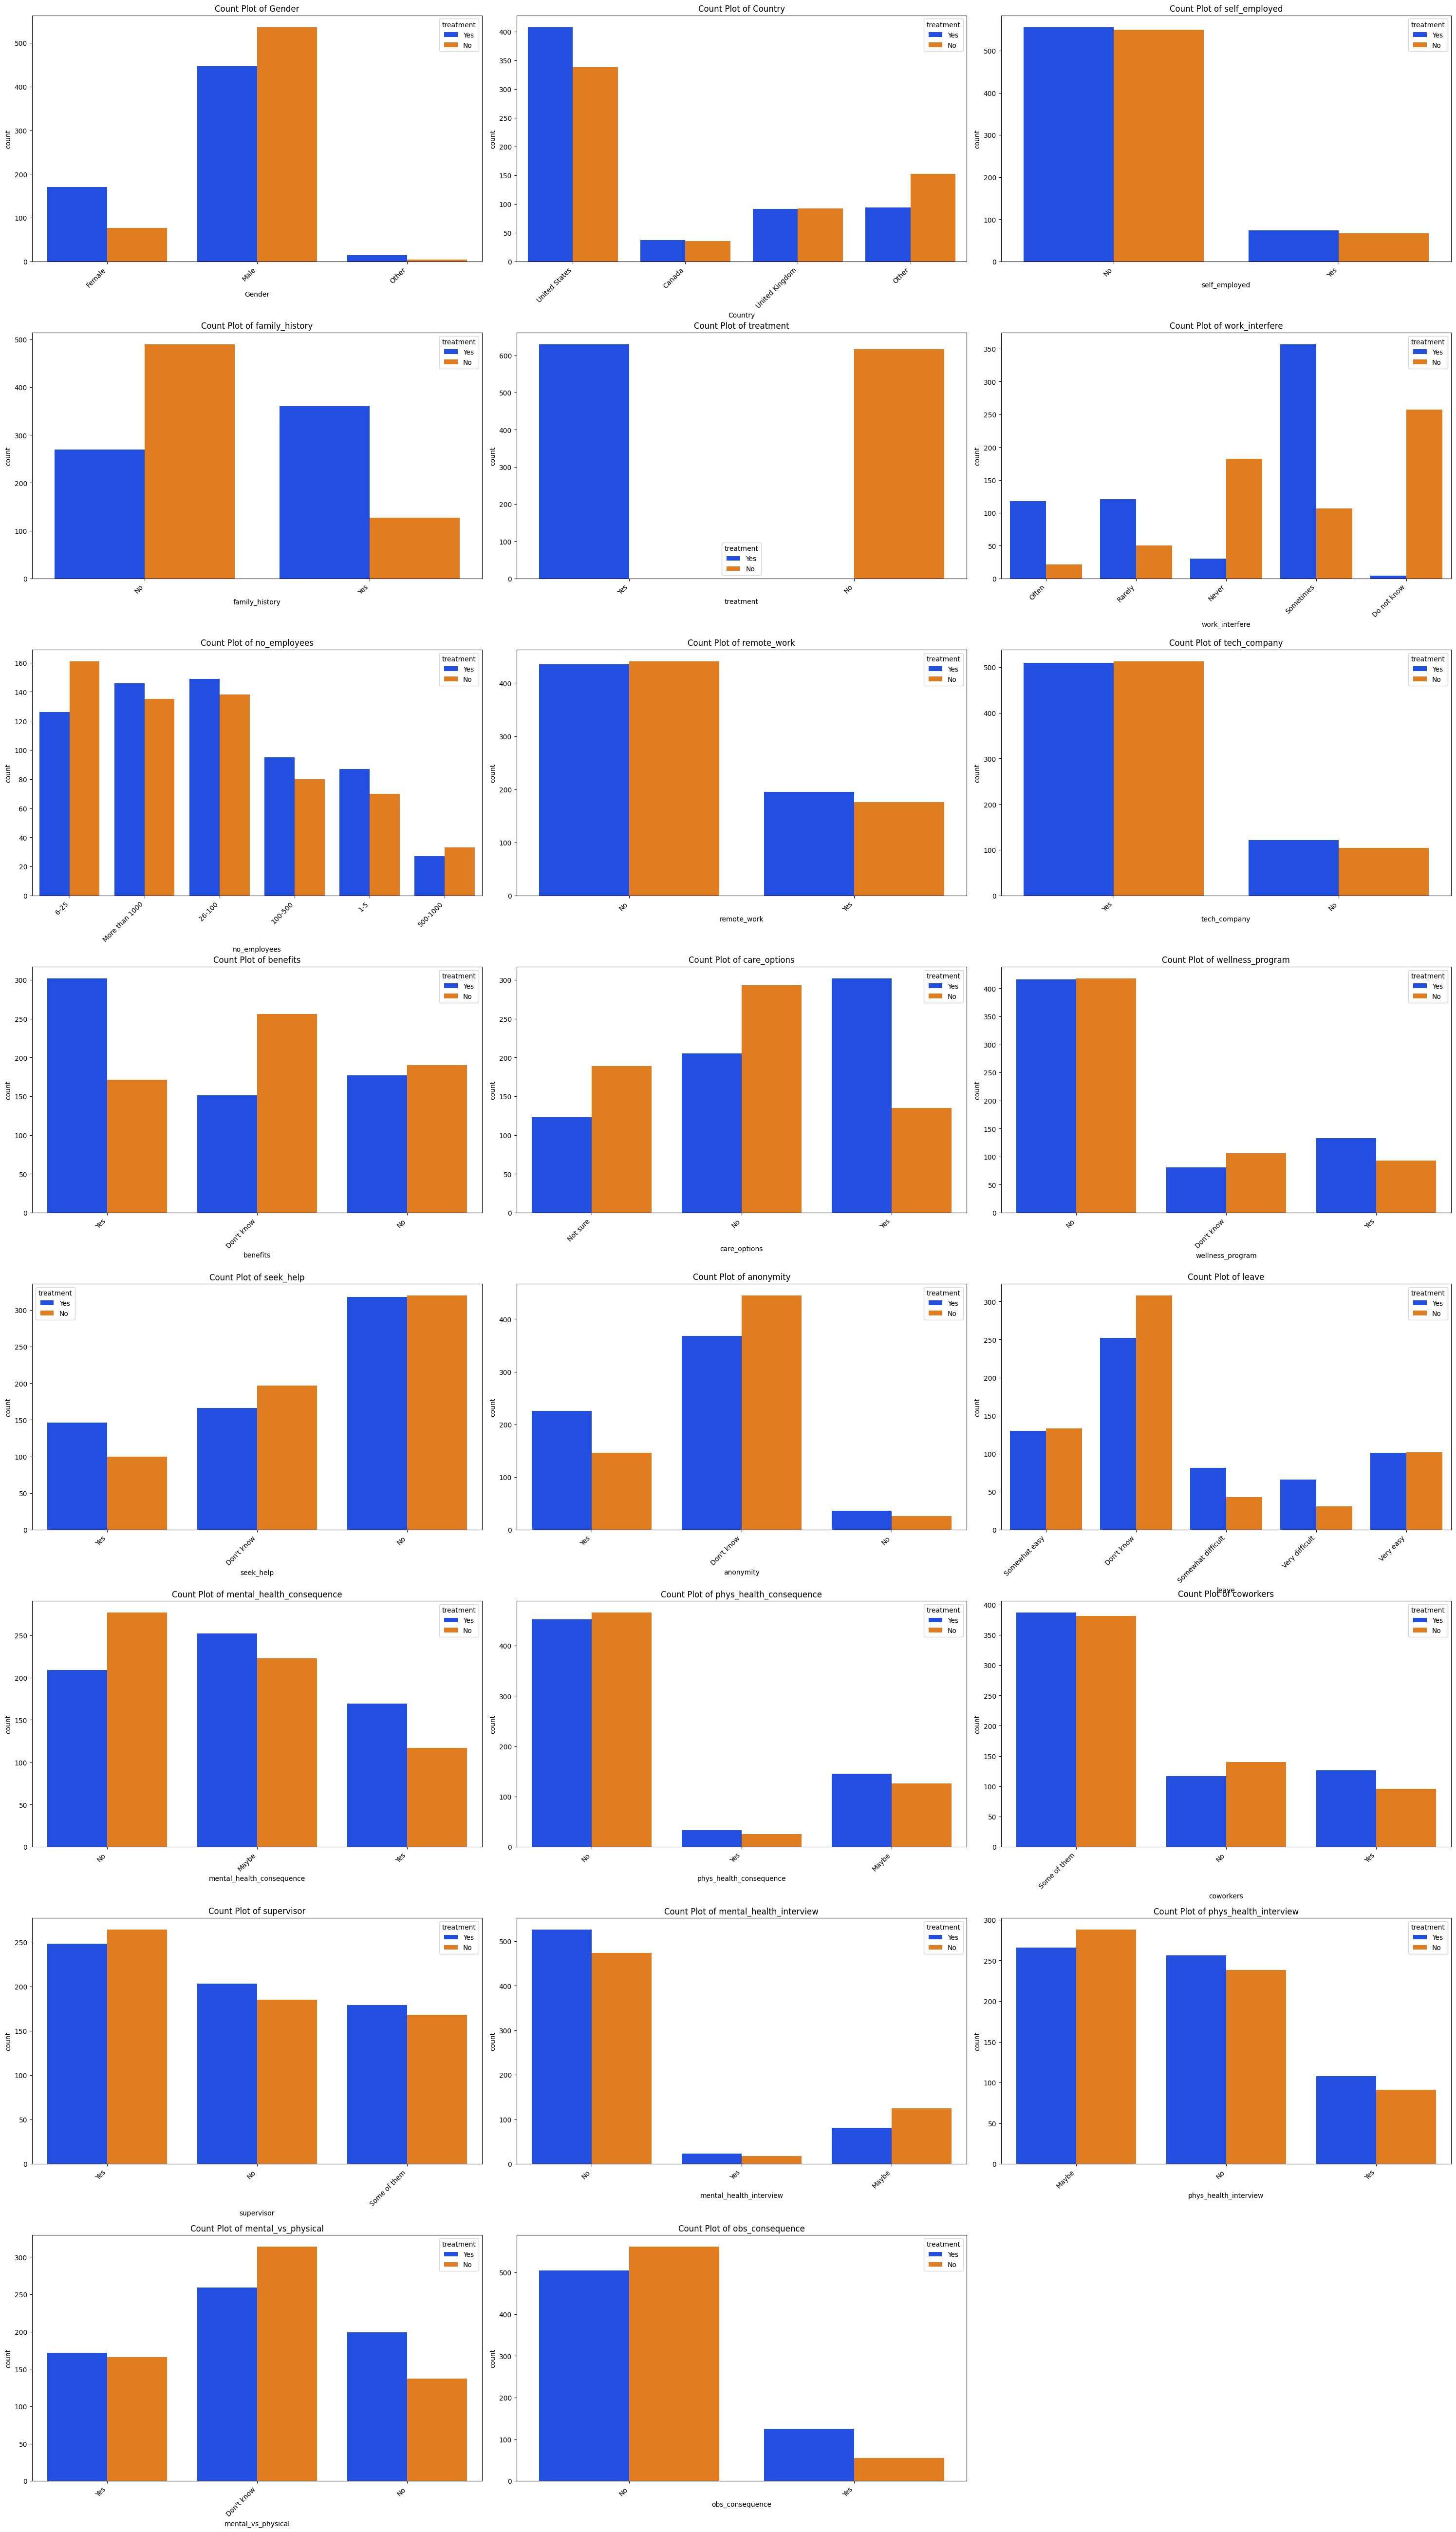

In [41]:
# Ploting bar-graphs for categorical columns
plt.figure(figsize=(30, 60))
for i, col in enumerate(cat_cols):
    plt.subplot(8, 3, i + 1)
    sns.countplot(data=dataset_clean, hue= 'treatment',
                  x=col, palette='bright')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Count Plot of {col}')
    plt.tight_layout()

plt.subplots_adjust(bottom=0.15)


plt.savefig('Count_plots_treatment.png', format='png', dpi=300)
plt.show()

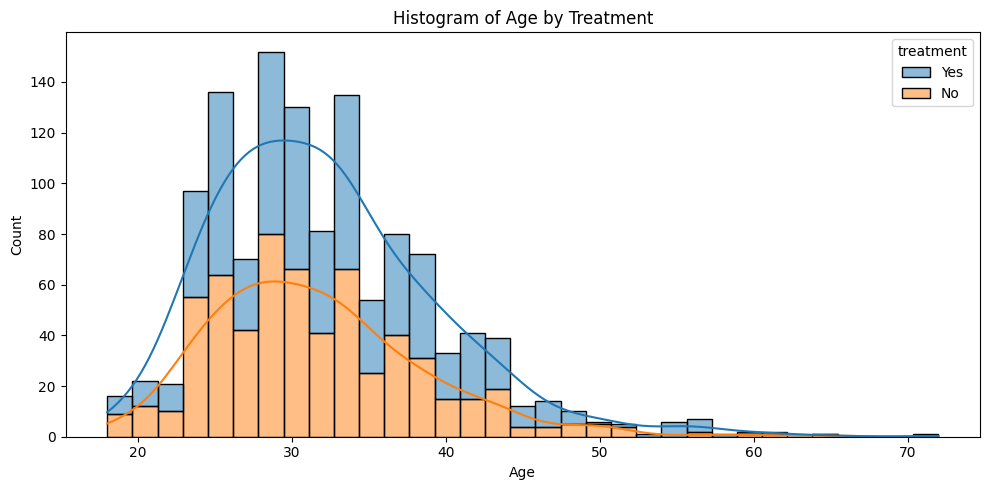

In [42]:
# Plotting histogram for Age with treatment categories
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset_clean, x='Age', hue='treatment', kde=True, multiple="stack")
plt.title('Histogram of Age by Treatment')
plt.tight_layout()

# Saving the figure
plt.savefig('Histogram_of_Age_with_Hue.png', format='png', dpi=300)

plt.show()

In [43]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1247 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1247 non-null   int64 
 1   Gender                     1247 non-null   object
 2   Country                    1247 non-null   object
 3   self_employed              1247 non-null   object
 4   family_history             1247 non-null   object
 5   treatment                  1247 non-null   object
 6   work_interfere             1247 non-null   object
 7   no_employees               1247 non-null   object
 8   remote_work                1247 non-null   object
 9   tech_company               1247 non-null   object
 10  benefits                   1247 non-null   object
 11  care_options               1247 non-null   object
 12  wellness_program           1247 non-null   object
 13  seek_help                  1247 non-null   object
 14  anonymity    

In [44]:
dataset_clean['treatment'].value_counts()

treatment
Yes    630
No     617
Name: count, dtype: int64

# **Encoding The Dataset**

In [45]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset
dataset_encoded = dataset_clean.copy()

le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in dataset_encoded.columns:
    if dataset_encoded[col].dtype == 'object':
          # Train on the training data
          le.fit(dataset_encoded[col])
          # Transform both training and testing data
          dataset_encoded[col] = le.transform(dataset_encoded[col])
          # Keep track of how many columns were label encoded
          le_count += 1
          print(col)

print('%d columns were label encoded.' % le_count)

Gender
Country
self_employed
family_history
treatment
work_interfere
no_employees
remote_work
tech_company
benefits
care_options
wellness_program
seek_help
anonymity
leave
mental_health_consequence
phys_health_consequence
coworkers
supervisor
mental_health_interview
phys_health_interview
mental_vs_physical
obs_consequence
23 columns were label encoded.


In [46]:
dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1247 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1247 non-null   int64
 1   Gender                     1247 non-null   int64
 2   Country                    1247 non-null   int64
 3   self_employed              1247 non-null   int64
 4   family_history             1247 non-null   int64
 5   treatment                  1247 non-null   int64
 6   work_interfere             1247 non-null   int64
 7   no_employees               1247 non-null   int64
 8   remote_work                1247 non-null   int64
 9   tech_company               1247 non-null   int64
 10  benefits                   1247 non-null   int64
 11  care_options               1247 non-null   int64
 12  wellness_program           1247 non-null   int64
 13  seek_help                  1247 non-null   int64
 14  anonymity                  12

In [47]:
for col in dataset_encoded.columns:
    print(f"\n{col}: {dataset_encoded[col].unique()}")


Age: [37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]

Gender: [0 1 2]

Country: [3 0 2 1]

self_employed: [0 1]

family_history: [0 1]

treatment: [1 0]

work_interfere: [2 3 1 4 0]

no_employees: [4 5 2 1 0 3]

remote_work: [0 1]

tech_company: [1 0]

benefits: [2 0 1]

care_options: [1 0 2]

wellness_program: [1 0 2]

seek_help: [2 0 1]

anonymity: [2 0 1]

leave: [2 0 1 3 4]

mental_health_consequence: [1 0 2]

phys_health_consequence: [1 2 0]

coworkers: [1 0 2]

supervisor: [2 0 1]

mental_health_interview: [1 2 0]

phys_health_interview: [0 1 2]

mental_vs_physical: [2 0 1]

obs_consequence: [0 1]


# **Feature Selection**

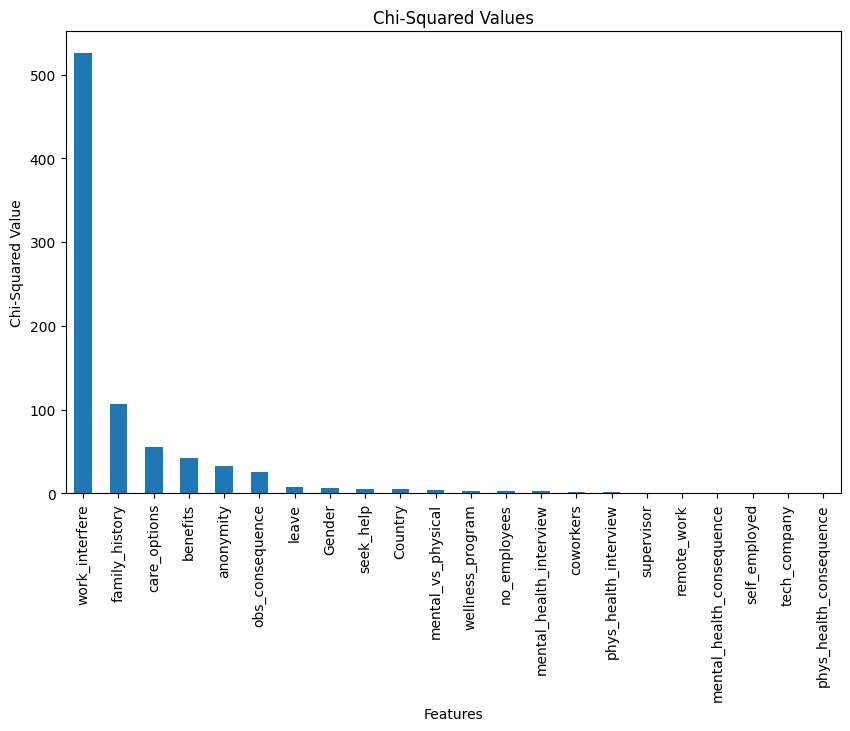

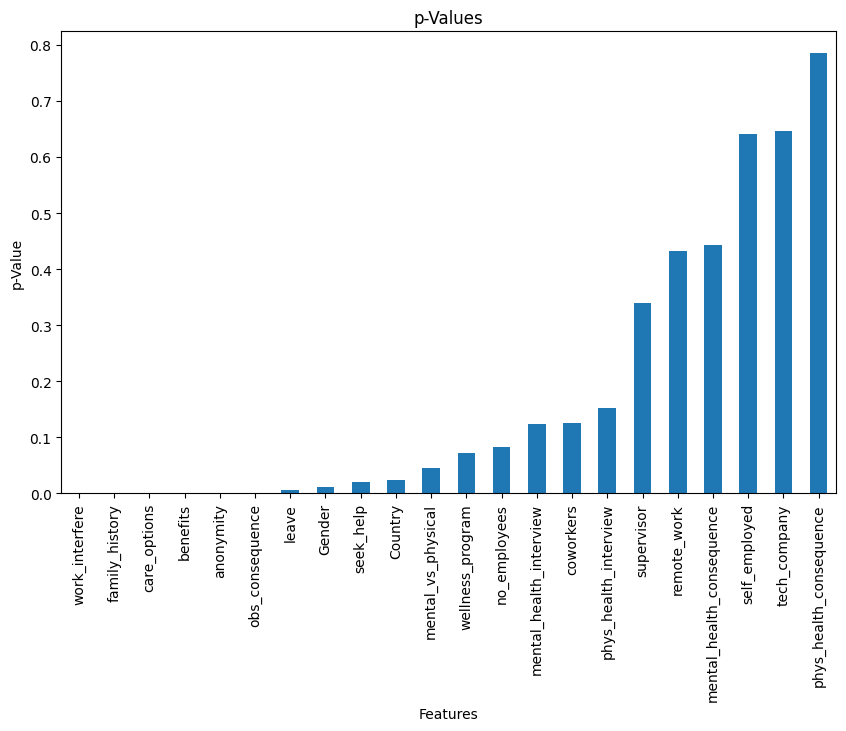

<Figure size 640x480 with 0 Axes>

In [48]:
from sklearn.feature_selection import chi2

# Separate features and target variable
x_chi = dataset_encoded.drop(columns=['treatment', 'Age',])
y_chi = dataset_encoded['treatment']

# Use chi-squared test for feature selection
chi_scores = chi2(x_chi, y_chi)

chi_values = pd.Series(chi_scores[0], index=x_chi.columns)
p_values = pd.Series(chi_scores[1], index=x_chi.columns)

chi_values.sort_values(ascending=False, inplace=True)
p_values.sort_values(ascending=True, inplace=True)

chi_values.plot.bar(figsize=(10, 6), title='Chi-Squared Values')
plt.xlabel('Features')
plt.ylabel('Chi-Squared Value')
plt.show()

p_values.plot.bar(figsize=(10, 6), title='p-Values')
plt.xlabel('Features')
plt.ylabel('p-Value')

plt.show()
plt.savefig('Chi-Squared.png', format='png', dpi=300)

In [49]:
# Create a DataFrame to display both chi-squared values and p-values with formatted p-values
chi_table = pd.DataFrame({
    'Chi-Squared Value': chi_values,
    'p-Value': p_values.apply(lambda x: f'{x:.10f}')
})

# Sort the DataFrame by p-value for better understanding
chi_table_sorted = chi_table.sort_values(by='p-Value', ascending=True)

# Display the table
print(chi_table_sorted)

                           Chi-Squared Value       p-Value
work_interfere                    525.101652  0.0000000000
family_history                    106.682849  0.0000000000
care_options                       55.106939  0.0000000000
benefits                           42.176490  0.0000000001
anonymity                          32.402691  0.0000000125
obs_consequence                    25.785084  0.0000003816
leave                               7.508980  0.0061392119
Gender                              6.384193  0.0115141069
seek_help                           5.415036  0.0199640408
Country                             5.077524  0.0242379645
mental_vs_physical                  3.978582  0.0460823462
wellness_program                    3.244762  0.0716520955
no_employees                        3.005862  0.0829638419
mental_health_interview             2.377829  0.1230684681
coworkers                           2.349934  0.1252883458
phys_health_interview               2.044354  0.15277185

# **Splitting the Dataset in Train Validation Test**

In [50]:
# For Decision Tree

from sklearn.model_selection import train_test_split

y_dt = dataset_encoded['treatment']
X_dt = dataset_encoded.drop('treatment', axis=1)
X_train_dt, X_temp_dt, y_train_dt, y_temp_dt = train_test_split(X_dt, y_dt, test_size=0.3, random_state=42)
X_val_dt, X_test_dt, y_val_dt, y_test_dt = train_test_split(X_temp_dt, y_temp_dt, test_size=0.5, random_state=42)

print("X_dt Train size:", X_train_dt.shape)
print("X_dt Test size:", X_test_dt.shape)
print("X_dt Validation size:", X_val_dt.shape)

X_dt Train size: (872, 23)
X_dt Test size: (188, 23)
X_dt Validation size: (187, 23)


# **Decision Tree**

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [52]:
def evaluate_model(model, X_train, X_val, y_train, y_val):
    for dataset_name, X_data, y_data in [('Train', X_train, y_train), ('Validation', X_val, y_val)]:
        y_pred = model.predict(X_data)
        acc = accuracy_score(y_data, y_pred)
        prec = precision_score(y_data, y_pred)
        recall = recall_score(y_data, y_pred)
        f1 = f1_score(y_data, y_pred)
        print(f"For {dataset_name}:")
        print(f"Accuracy: {acc}")
        print(f"Precision: {prec}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print()

In [53]:
# For DT
def evaluate_model_dt(model, X_train_dt, X_val_dt, y_train_dt, y_val_dt):
    for dataset_name, X_data, y_data in [('Train', X_train_dt, y_train_dt), ('Validation', X_val_dt, y_val_dt)]:
        y_pred = model.predict(X_data)
        acc = accuracy_score(y_data, y_pred)
        prec = precision_score(y_data, y_pred)
        recall = recall_score(y_data, y_pred)
        f1 = f1_score(y_data, y_pred)
        print(f"For {dataset_name}:")
        print(f"Accuracy: {acc}")
        print(f"Precision: {prec}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print()

In [54]:
evaluate_model_dt(model, X_train_dt, X_val_dt, y_train_dt, y_val_dt)

For Train:
Accuracy: 0.8348623853211009
Precision: 0.7735849056603774
Recall: 0.9447004608294931
F1 Score: 0.8506224066390042

For Validation:
Accuracy: 0.839572192513369
Precision: 0.8032786885245902
Recall: 0.9423076923076923
F1 Score: 0.8672566371681416



In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
model_v3 = DecisionTreeClassifier(random_state=42)
model_v3.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(random_state=42)

In [57]:
V3_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}


In [58]:
grid_search = GridSearchCV(estimator=model_v3, param_grid=V3_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_dt, y_train_dt)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15, 20, 25],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [59]:
best_param = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_param)
print("Best Score:", best_score)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Best Score: 0.8222463054187192


In [60]:
best_model = grid_search.best_estimator_
best_model.fit(X_train_dt, y_train_dt)
evaluate_model(best_model, X_train_dt, X_val_dt, y_train_dt, y_val_dt)

For Train:
Accuracy: 0.8543577981651376
Precision: 0.828693790149893
Recall: 0.8917050691244239
F1 Score: 0.8590455049944506

For Validation:
Accuracy: 0.8021390374331551
Precision: 0.8130841121495327
Recall: 0.8365384615384616
F1 Score: 0.8246445497630331



In [61]:
y_pred_dt = best_model.predict(X_test_dt)

model_comparison_dt = {
    'Accuracy': accuracy_score(y_test_dt, y_pred_dt),
    'Precision': precision_score(y_test_dt, y_pred_dt),
    'Recall': recall_score(y_test_dt, y_pred_dt),
    'F1 Score': f1_score(y_test_dt, y_pred_dt)
}

print("Decision Tree Model Performance on Test Data:")
for metric, value in model_comparison_dt.items():
    print(f"{metric}: {value}")

Decision Tree Model Performance on Test Data:
Accuracy: 0.7819148936170213
Precision: 0.7339449541284404
Recall: 0.8695652173913043
F1 Score: 0.7960199004975125


# **Feature Selection Based on DTs**

In [62]:
#Using DTs feature importance
feature_importances = model_v3.feature_importances_
feature_names = X_dt.columns

In [63]:
# Creating DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


In [64]:
#Looking for Importance Values using DTs
print("\nFeature Importances:")
importance_df = importance_df[importance_df['Feature'] != 'Age']
print(importance_df)


Feature Importances:
                      Feature  Importance
5              work_interfere    0.487711
14                      leave    0.045533
6                no_employees    0.035484
2                     Country    0.033139
11           wellness_program    0.032285
4              family_history    0.028636
13                  anonymity    0.026248
9                    benefits    0.026041
12                  seek_help    0.023186
15  mental_health_consequence    0.022962
18                 supervisor    0.018286
17                  coworkers    0.017392
7                 remote_work    0.016437
21         mental_vs_physical    0.015459
8                tech_company    0.014197
16    phys_health_consequence    0.012384
20      phys_health_interview    0.012276
22            obs_consequence    0.011771
10               care_options    0.010959
3               self_employed    0.009533
1                      Gender    0.004853
19    mental_health_interview    0.004321


# **Final Selected Feature Based on Chi2 and DT**

In [65]:
# Ensure all arrays have the same length
min_length = min(len(feature_names), len(chi_values), len(p_values))

# Slice each list to match the minimum length
feature_names = feature_names[:min_length]
chi_values = chi_values[:min_length]
p_values = p_values[:min_length]

# Create the chi_table DataFrame
chi_table = pd.DataFrame({
    'Feature': feature_names,
    'Chi-Squared Value': chi_values,
    'p-Value': p_values.apply(lambda x: f'{x:.10f}')
})

# If the Feature column contains 'Age', we drop it
importance_df = importance_df[importance_df['Feature'] != 'Age']

# Merge tables on 'Feature'
merged_table = pd.merge(importance_df, chi_table, on='Feature')

# Sort by Importance in descending order
merged_table_sorted = merged_table.sort_values(by='Importance', ascending=False)

# Display the final sorted table
import IPython.display as display
display.display(merged_table_sorted)

,Feature,Importance,Chi-Squared Value,p-Value
0,work_interfere,0.487711,25.785084,0.0000003816
1,leave,0.045533,2.349934,0.1252883458
2,no_employees,0.035484,7.508980,0.0061392119
3,Country,0.033139,55.106939,0.0000000000
4,wellness_program,0.032285,3.244762,0.0716520955
5,family_history,0.028636,32.402691,0.0000000125
6,anonymity,0.026248,2.377829,0.1230684681
7,benefits,0.026041,5.077524,0.0242379645
8,seek_help,0.023186,3.005862,0.0829638419
9,mental_health_consequence,0.022962,2.044354,0.1527718507


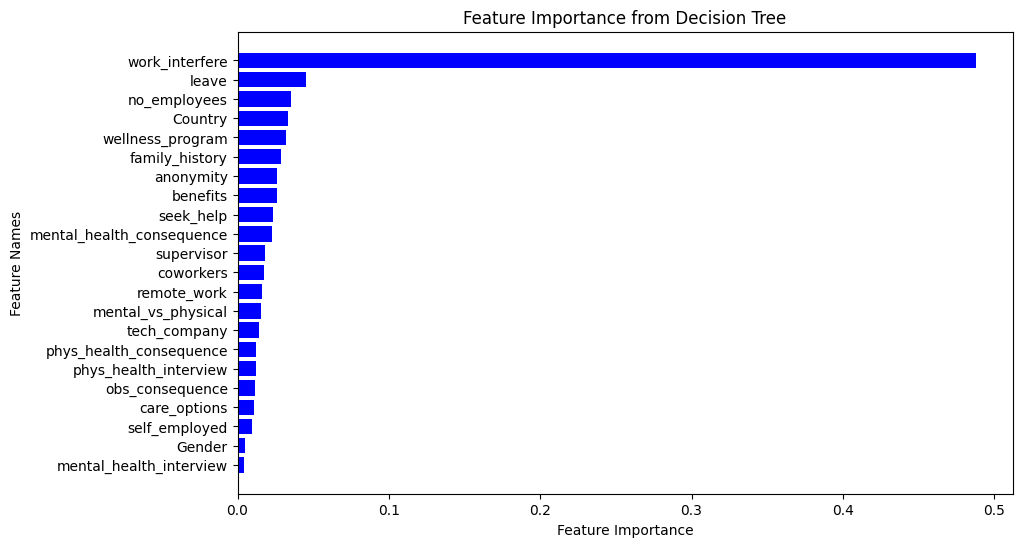

In [66]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance from Decision Tree")
plt.gca().invert_yaxis()
plt.show()

In [67]:
selected_features = [
    "work_interfere", "leave", "Country", "family_history",
    "no_employees", "benefits", "self_employed", "Gender",
    "Age", "mental_health_consequence", "treatment"
]

# Create a copy with only the selected features
df_best_features = dataset_encoded[selected_features].copy()

# Display the first few rows to confirm
df_best_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1247 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   work_interfere             1247 non-null   int64
 1   leave                      1247 non-null   int64
 2   Country                    1247 non-null   int64
 3   family_history             1247 non-null   int64
 4   no_employees               1247 non-null   int64
 5   benefits                   1247 non-null   int64
 6   self_employed              1247 non-null   int64
 7   Gender                     1247 non-null   int64
 8   Age                        1247 non-null   int64
 9   mental_health_consequence  1247 non-null   int64
 10  treatment                  1247 non-null   int64
dtypes: int64(11)
memory usage: 116.9 KB


In [68]:
df_best_features.head()

,work_interfere,leave,Country,family_history,no_employees,benefits,self_employed,Gender,Age,mental_health_consequence,treatment
0,2,2,3,0,4,2,0,0,37,1,1
1,3,0,3,0,5,0,0,1,44,0,0
2,3,1,0,0,4,1,0,1,32,1,0
3,2,1,2,1,2,1,0,1,31,2,1
4,1,0,3,0,1,2,0,1,31,1,0


In [69]:
y = df_best_features['treatment']
X = df_best_features.drop('treatment', axis=1)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X Train size:", X_train.shape)
print("X Test size:", X_test.shape)
print("X Validation size:", X_val.shape)

X Train size: (872, 10)
X Test size: (188, 10)
X Validation size: (187, 10)


In [70]:
#After using DTs feature selection moving forward with rest of features
from sklearn.model_selection import train_test_split

y = df_best_features['treatment']
X = df_best_features.drop('treatment', axis=1)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X Train size:", X_train.shape)
print("X Test size:", X_test.shape)
print("X Validation size:", X_val.shape)

X Train size: (872, 10)
X Test size: (188, 10)
X Validation size: (187, 10)


# **DTs after feature selection**

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

model_d1 = DecisionTreeClassifier(max_depth=3, random_state=42)
model_d1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [72]:
def evaluate_model(model_d1, X_train, X_val, y_train, y_val):
    for dataset_name, X_data, y_data in [('Train', X_train, y_train), ('Validation', X_val, y_val)]:
        y_pred = model_d1.predict(X_data)
        acc = accuracy_score(y_data, y_pred)
        prec = precision_score(y_data, y_pred)
        recall = recall_score(y_data, y_pred)
        f1 = f1_score(y_data, y_pred)
        print(f"For {dataset_name}:")
        print(f"Accuracy: {acc}")
        print(f"Precision: {prec}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print()

In [73]:
evaluate_model(model_d1, X_train, X_val, y_train, y_val)

For Train:
Accuracy: 0.8348623853211009
Precision: 0.7735849056603774
Recall: 0.9447004608294931
F1 Score: 0.8506224066390042

For Validation:
Accuracy: 0.839572192513369
Precision: 0.8032786885245902
Recall: 0.9423076923076923
F1 Score: 0.8672566371681416



In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
model_d3 = DecisionTreeClassifier(random_state=42)
model_d3.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [76]:
d3_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}


In [77]:
grid_search = GridSearchCV(estimator=model_d3, param_grid=d3_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 15, 20, 25],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [78]:
best_param = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_param)
print("Best Score:", best_score)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Best Score: 0.8370968801313629


In [79]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
evaluate_model(best_model, X_train, X_val, y_train, y_val)

For Train:
Accuracy: 0.8509174311926605
Precision: 0.8534883720930233
Recall: 0.8456221198156681
F1 Score: 0.8495370370370371

For Validation:
Accuracy: 0.8021390374331551
Precision: 0.8526315789473684
Recall: 0.7788461538461539
F1 Score: 0.814070351758794



In [80]:
y_pred_dt = best_model.predict(X_test)

model_comparison_dt = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1 Score': f1_score(y_test, y_pred_dt)
}

print("Decision Tree Model Performance on Test Data:")
for metric, value in model_comparison_dt.items():
    print(f"{metric}: {value}")

Decision Tree Model Performance on Test Data:
Accuracy: 0.7978723404255319
Precision: 0.78125
Recall: 0.8152173913043478
F1 Score: 0.797872340425532


In [81]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [82]:
# Visualizing the decision tree
dot_data = export_graphviz(model_d3, out_file=None,
                           feature_names=X.columns,
                           class_names=['Class0', 'Class1'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png")
graph.view()

'decision_tree.pdf'

In [83]:
from sklearn.tree import plot_tree

Error: no "view" mailcap rules found for type "application/pdf"
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'decision_tree.pdf'


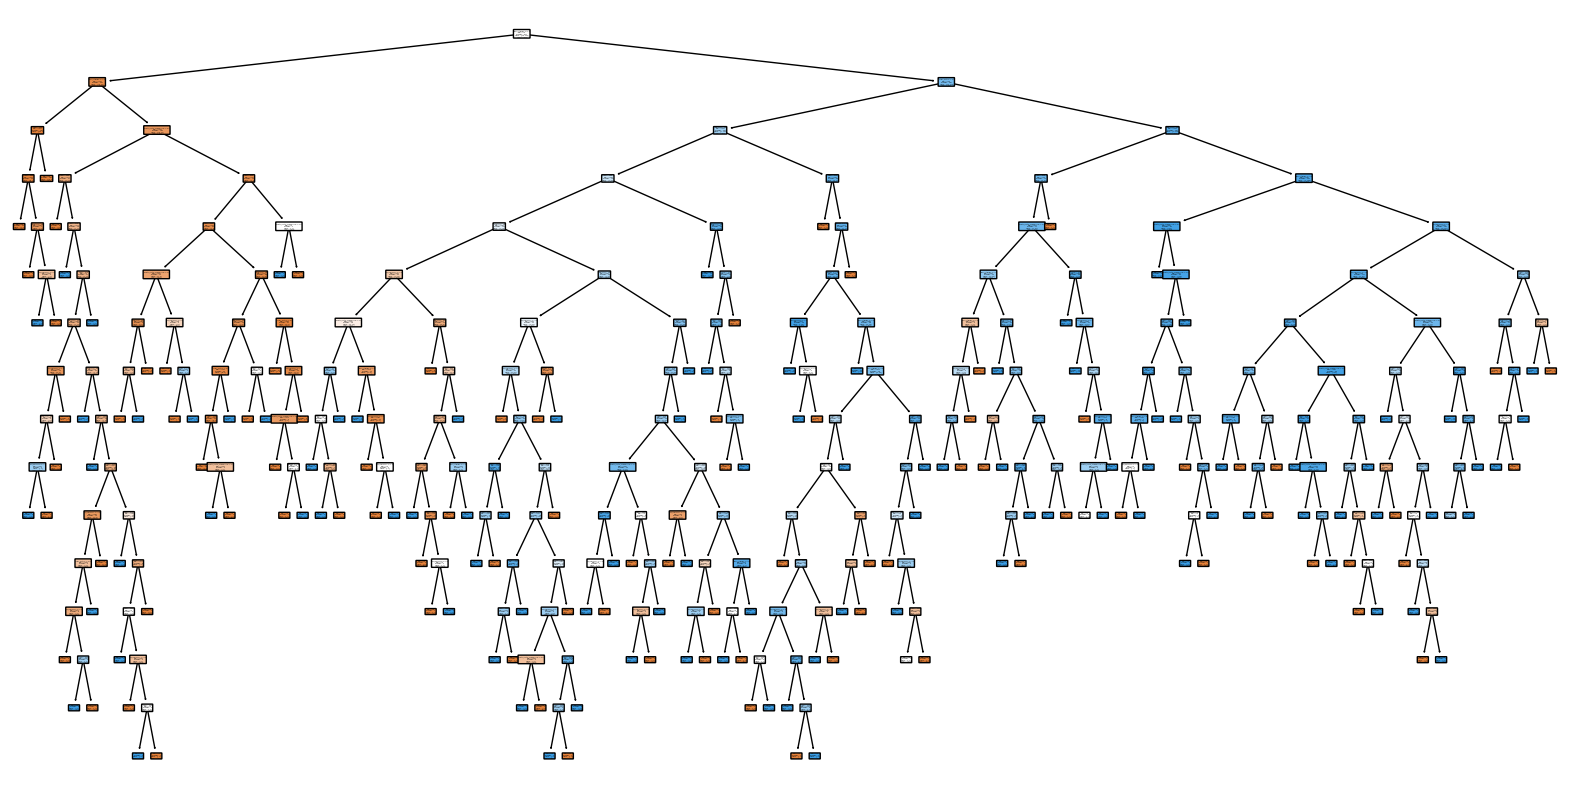

In [84]:
plt.figure(figsize=(20, 10))
plot_tree(model_d3,
          feature_names=X.columns,
          class_names=['Class0', 'Class1'],
          filled=True,
          rounded=True)
plt.savefig('Decision Tree.png', format='png', dpi=300)
plt.show()

# **KNN**

In [85]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [86]:
scaler = MinMaxScaler()

In [87]:
X_scaled = scaler.fit_transform(X)

In [88]:
model_k1 = KNeighborsClassifier(n_neighbors=7)
model_k1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [89]:
evaluate_model(model_k1, X_train, X_val, y_train, y_val)

For Train:
Accuracy: 0.8268348623853211
Precision: 0.7954070981210856
Recall: 0.8778801843317973
F1 Score: 0.8346111719605696

For Validation:
Accuracy: 0.7754010695187166
Precision: 0.7870370370370371
Recall: 0.8173076923076923
F1 Score: 0.8018867924528303



In [90]:
model_k3 = KNeighborsClassifier()

In [91]:
k3_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'p': [1, 2, 3],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [92]:
grid_search2 = GridSearchCV(estimator=model_k3, param_grid=k3_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [93]:
best_param2 = grid_search2.best_params_
best_score2 = grid_search2.best_score_

print("Best Parameters:", best_param2)
print("Best Score:", best_score2)
print(' ')


Best Parameters: {'metric': 'minkowski', 'n_neighbors': 9, 'p': 3, 'weights': 'distance'}
Best Score: 0.7981149425287356
 


In [94]:
best_model2 = grid_search2.best_estimator_
best_model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9, p=3, weights='distance')

In [95]:
evaluate_model(best_model2, X_train, X_val, y_train, y_val)

For Train:
Accuracy: 0.9965596330275229
Precision: 0.9976905311778291
Recall: 0.9953917050691244
F1 Score: 0.9965397923875432

For Validation:
Accuracy: 0.7754010695187166
Precision: 0.7980769230769231
Recall: 0.7980769230769231
F1 Score: 0.7980769230769231



In [96]:
y_pred_knn = best_model2.predict(X_test)

model_comparison_knn = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1 Score': f1_score(y_test, y_pred_knn)
}

print("KNN Model Performance on Test Data:")
for metric, value in model_comparison_knn.items():
    print(f"{metric}: {value}")

KNN Model Performance on Test Data:
Accuracy: 0.7340425531914894
Precision: 0.71
Recall: 0.7717391304347826
F1 Score: 0.7395833333333333


# **Random Forest**

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
model_r1 = RandomForestClassifier(n_estimators=100)
model_r1.fit(X_train, y_train)

RandomForestClassifier()

In [99]:
evaluate_model(model_r1, X_train, X_val, y_train, y_val)

For Train:
Accuracy: 0.9965596330275229
Precision: 0.9954022988505747
Recall: 0.9976958525345622
F1 Score: 0.996547756041427

For Validation:
Accuracy: 0.8021390374331551
Precision: 0.8252427184466019
Recall: 0.8173076923076923
F1 Score: 0.821256038647343



In [100]:
model_r3 = RandomForestClassifier()

In [101]:
# Defining hyperparameter grid for Random Forest
r3_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [102]:
grid_search3 = GridSearchCV(estimator=model_r3, param_grid=r3_grid, cv=5, scoring='accuracy', n_jobs=-1, )
grid_search3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [103]:
best_param3 = grid_search3.best_params_
best_score3 = grid_search3.best_score_

print("Best Parameters:", best_param3)
print("Best Score:", best_score3)
print(' ')


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8497011494252874
 


In [104]:
best_model3 = grid_search3.best_estimator_
best_model3.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=200)

In [105]:
evaluate_model(best_model3, X_train, X_val, y_train, y_val)

For Train:
Accuracy: 0.8910550458715596
Precision: 0.8568421052631578
Recall: 0.9377880184331797
F1 Score: 0.8954895489548954

For Validation:
Accuracy: 0.8235294117647058
Precision: 0.8317757009345794
Recall: 0.8557692307692307
F1 Score: 0.8436018957345972



In [106]:
y_pred_rf = best_model3.predict(X_test)

model_comparison_rf = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf)
}

print("Random Forest Model Performance on Test Data:")
for metric, value in model_comparison_rf.items():
    print(f"{metric}: {value}")

Random Forest Model Performance on Test Data:
Accuracy: 0.8031914893617021
Precision: 0.7477477477477478
Recall: 0.9021739130434783
F1 Score: 0.8177339901477833


# **Logistic Regression**

In [107]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train, y_train)

evaluate_model(model_lr, X_train, X_val, y_train, y_val)

For Train:
Accuracy: 0.8119266055045872
Precision: 0.7896995708154506
Recall: 0.847926267281106
F1 Score: 0.8177777777777778

For Validation:
Accuracy: 0.8128342245989305
Precision: 0.822429906542056
Recall: 0.8461538461538461
F1 Score: 0.8341232227488151



In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Logistic Regression
lr_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solvers that support l1 & l2
}

# Perform Grid Search
grid_search_lr = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=1000),
                              param_grid=lr_grid,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1)

grid_search_lr.fit(X_train, y_train)

# Get the best parameters and score
best_param_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print("Best Parameters:", best_param_lr)
print("Best Score:", best_score_lr)

# Train Logistic Regression with best parameters
best_lr_model = LogisticRegression(**best_param_lr, random_state=42, max_iter=1000)
best_lr_model.fit(X_train, y_train)

# Evaluate model
evaluate_model(best_lr_model, X_train, X_val, y_train, y_val)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8095500821018062
For Train:
Accuracy: 0.8130733944954128
Precision: 0.7876857749469215
Recall: 0.8548387096774194
F1 Score: 0.8198895027624309

For Validation:
Accuracy: 0.8074866310160428
Precision: 0.8148148148148148
Recall: 0.8461538461538461
F1 Score: 0.830188679245283



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [109]:
y_pred_lr = best_lr_model.predict(X_test)

model_lr = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1 Score': f1_score(y_test, y_pred_lr)
}

print("Logistic Regresson Model Performance on Test Data:")
for metric, value in model_lr.items():
    print(f"{metric}: {value}")

Logistic Regresson Model Performance on Test Data:
Accuracy: 0.7659574468085106
Precision: 0.74
Recall: 0.8043478260869565
F1 Score: 0.7708333333333333


# **Comparison**

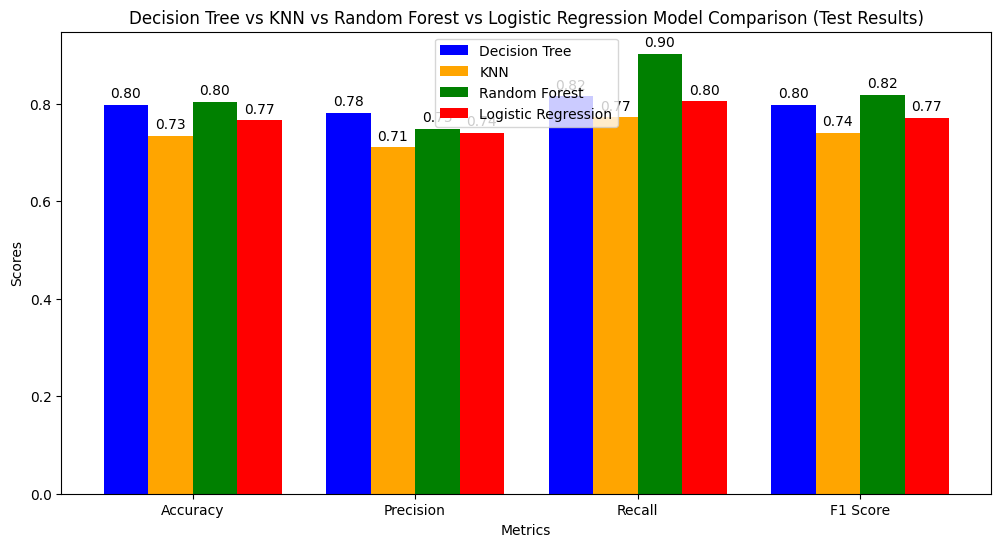

In [110]:
# Storing the best test results in a dictionary
model_comparison_test = {
    'Decision Tree': {
        'Accuracy': accuracy_score(y_test, best_model.predict(X_test)),
        'Precision': precision_score(y_test, best_model.predict(X_test)),
        'Recall': recall_score(y_test, best_model.predict(X_test)),
        'F1 Score': f1_score(y_test, best_model.predict(X_test))
    },
    'KNN': {
        'Accuracy': accuracy_score(y_test, best_model2.predict(X_test)),
        'Precision': precision_score(y_test, best_model2.predict(X_test)),
        'Recall': recall_score(y_test, best_model2.predict(X_test)),
        'F1 Score': f1_score(y_test, best_model2.predict(X_test))
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, best_model3.predict(X_test)),
        'Precision': precision_score(y_test, best_model3.predict(X_test)),
        'Recall': recall_score(y_test, best_model3.predict(X_test)),
        'F1 Score': f1_score(y_test, best_model3.predict(X_test))
    },
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, best_lr_model.predict(X_test)),
        'Precision': precision_score(y_test, best_lr_model.predict(X_test)),
        'Recall': recall_score(y_test, best_lr_model.predict(X_test)),
        'F1 Score': f1_score(y_test, best_lr_model.predict(X_test))
    }
}

# Extracting the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
decision_tree_values = [model_comparison_test['Decision Tree'][metric] for metric in metrics]
knn_values = [model_comparison_test['KNN'][metric] for metric in metrics]
random_forest_values = [model_comparison_test['Random Forest'][metric] for metric in metrics]
logistic_regression_values = [model_comparison_test['Logistic Regression'][metric] for metric in metrics]

# Bar plot for comparison
x = np.arange(len(metrics))  # Label locations
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5 * width, decision_tree_values, width, label='Decision Tree', color='blue')
rects2 = ax.bar(x - 0.5 * width, knn_values, width, label='KNN', color='orange')
rects3 = ax.bar(x + 0.5 * width, random_forest_values, width, label='Random Forest', color='green')
rects4 = ax.bar(x + 1.5 * width, logistic_regression_values, width, label='Logistic Regression', color='red')

# Labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Decision Tree vs KNN vs Random Forest vs Logistic Regression Model Comparison (Test Results)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Display values on top of bars
for rect in rects1 + rects2 + rects3 + rects4:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # Offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.savefig('Model_Comparison.png', format='png', dpi=300)
plt.show()